# Theoretischer Hintergrund
Zunächst wird das Naive-Bayes-Verfahren erläutert und anhand eines Beispiels dargestellt. Bevor wir die dem Verfahren zugrunde liegenden Ideen erläutern, müssen wir das Klassifikationsproblem erst noch ein wenig formalisieren.

## Ein Beispiel

Wir betrachten das folgende Beispiel, welches fiktive (verdichtete)
Daten zu einer Problemstellung der Firma behandelt. Die Firma denkt
darüber nach, ihren Umsatz mittels einer Marketingkampagne zu steigern.
Dabei will die Firma nur solchen Kunden einen Gutschein für weitere
Bestellungen senden, bei denen zu erwarten ist, dass sie nicht ohnehin
innerhalb von 90 Tagen eine neue Bestellung aufgeben würden (da ja sonst
Geld verloren ginge). Es soll eine Vorhersage zum Gutscheinversand auf
Basis der Kenntnis über den Ablauf vergangener Bestellungen erfolgen,
wobei die Attribute *Verspätung, Kunde, Posten* und *Rücksendung*
betrachtet werden und mittels dieser darauf geschlossen werden soll, ob
eine Neubestellung (innerhalb von 90 Tagen) erfolgen wird (was dann
hieße, dass kein Gutschein zu senden wäre). Die zugehörigen Daten zeigt
die folgende Tabelle. Dabei bedeuten die Werte in der Spalte `Kunde`
**F**rau, **M**ann und **U**nternehmen.

   Fall |  Verspätung |  Kunde  | Posten |  Rücksendung  | ***Neubestellung?***
  :--------:|:--------------: | :---------: |:----------:| :---------------: |:------------------:
      1     |       lang      |      M      |   einzel   |       nein        |        nein
      2     |       lang      |      M      |   einzel   |        ja         |        nein
      3     |      keine      |      M      |   einzel   |       nein        |         ja
      4     |       kurz      |      F      |   einzel   |       nein        |         ja
      5     |       kurz      |      U      |  mehrere   |       nein        |         ja
      6     |       kurz      |      U      |  mehrere   |        ja         |        nein
      7     |      keine      |      U      |  mehrere   |        ja         |         ja
      8     |       lang      |      F      |   einzel   |       nein        |        nein
      9     |       lang      |      U      |  mehrere   |       nein        |         ja
      10    |       kurz      |      F      |  mehrere   |       nein        |         ja
      11    |       lang      |      F      |  mehrere   |        ja         |         ja
      12    |      keine      |      F      |   einzel   |        ja         |         ja
      13    |      keine      |      M      |  mehrere   |       nein        |         ja
      14    |       kurz      |      F      |   einzel   |        ja         |        nein

  : Beispieldaten für Entscheidungen zum Gutscheinversand<span
  data-label="tab:dmgutbsp"></span>

Hierbei müssen also nur *binäre* Entscheidungen (Ja/Nein) getroffen
werden. Etwas allgemeiner geht es darum, die Datensätze in zwei
*Klassen* einzuteilen. Mit den obigen Trainingsdaten wollen wir dann
für neue Datensätze Vorhersagen treffen, zu welcher Klasse diese wohl
gehören.

### Formalisierung des Klassifikationsproblems

Um die Notation für die Formalisierung zu vereinfachen, stellen wir uns
vor, dass sämtliche Attributwerte reelle Zahlen wären, die ggf. aber nur
nominal bzw. ordinal zu interpretieren wären. Dies lässt sich durch
Transformation immer erreichen, etwa indem man für nominale Attribute
den einzelnen Attributwerten *irgendwelche verschiedenen* Zahlenwerte
zuordnet oder indem man ordinalen Attributen Zahlenwerte so zuordnet,
dass die *Ordnung erhalten* bleibt. Damit kann man ohne Beschränkung der
Allgemeinheit annehmen, dass insgesamt $m$ Datensätze
$d_1,d_2,\dots,d_m$ mit jeweils $\mu$ reellwertigen Merkmalen
(bzw. *Attributen*) $A_1,A_2,\dots,A_\mu$ betrachtet werden, d.h.
$$
\mathcal{D} = \{d_1,d_2,\dots,d_m\} \subset \mathbb{R}^\mu
$$ 
stellt die *Datenbasis*
(die Menge der betrachteten Datensätze) dar. Dabei nehme $A_i$ (das
$i$-te Attribut) $m_i$ verschiedene Werte $w_{i,j}\>,\ j=1,2,\dots,m_i$
mit der Häufigkeit $m_{i,j}$ an.

Die Datensätze aus $\mathcal{D}$ sind im Allgemeinen $\kappa$ Klassen
$c^{(k)}\>,\ k=1,\dots,\kappa$ zugeordnet. Hierbei ist
$\kappa\in\mathbb{N},\ \kappa\ge2$. Wie für die Attributwerte kann auch für
die Klassen angenommen werden, dass diese (natürliche) Zahlen sind,
d.h. $c^{(k)}=k-1\>,\
k=1,\dots,\kappa$. Dabei kommt es lediglich auf die Unterscheidbarkeit
an und es ist keine Rangfolge festgelegt (Nominalskala). Im Falle einer
binären Klassifikation wie im Gutscheinproblem ist also $\kappa=2$ und
es gibt die Klassen 0 und 1; eine Darstellung, die auch in der Praxis
häufig anzutreffen ist.

In den im Rahmen einer Klassifikation betrachteten *Trainingsdaten*
$\mathcal{T}$ ist dann jedem Datensatz $d_l$ noch eine (wahre bzw. beobachtete)
Klasse $c_l\in\{0,1,\dots,\kappa-1\}$ zugeordnet, d.h. der $l$-te
Trainingsdatensatz besteht aus Tupeln $(d_l,c_l)$, wobei für die
Klassenzuordnungen $\mathcal{C}$ gilt 
$$
\mathcal{C} = (c_1,c_2,\dots,c_m)\>,\ c_l \in \{0,1,\dots,\kappa-1\}\>,\ l=1,2,\dots,
m$$
so dass sich die Trainingsdaten darstellen lassen als
$$
\mathcal{T} =(\mathcal{D},\mathcal{C}) = \{(d_1,c_1),(d_2,c_2),\dots,(d_m,c_m)\} 
  \subset \mathbb{R}^\mu\times\{0,1,\dots,\kappa-1\}\>.
$$ 
Das Klassifikationsproblem besteht dann darin, eine Funktion
$$\begin{aligned}
 f:\mathbb{R}^\mu&\to\{0,1,\dots,\kappa-1\}\\
 d&\mapsto f(d)=c\end{aligned}$$ 
zu finden, die zu einem Datensatz $d$
die gesuchte Klasse $c$ liefert bzw. vorhersagt. In diesem Zusammenhang
wird $f$ als *Klassifikator* und dessen Anwendung als *Klassifikation*
bezeichnet. Die Bestimmung der Funktion $f$ aus den Trainingsdaten
$\mathcal{T}$ heißt *Klassifikatorentwurf*.


## Das Naive Bayes Verfahren


Das naive Bayes-Verfahren macht zunächst einige vereinfachende
Annahmen und bedient sich dann des *Theorems von <span
style="font-variant:small-caps;">Bayes</span>*, um aus Basisstatistiken
(im wesentlichen relative Häufigkeiten) Entscheidungen abzuleiten. Diese
basieren auf Berechnungen von *bedingten Wahrscheinlichkeiten*, die, wie
üblich, durch die relativen Häufigkeiten aus den Trainingsdaten $\mathcal{T}$
geschätzt werden. Hier wird also Kommissar Zufall sozusagen durch
Kommissar <span style="font-variant:small-caps;">Bayes</span> ersetzt, 
der zunächst Indizien sammelt, diese dann mit
Wahrscheinlichkeiten bewertet und schließlich den Hauptverdächtigen
bestimmt.

### Bedingte Wahrscheinlichkeiten 
Um Indizien in der genannten Form nutzen zu können, soll zunächst noch
die übliche Notation für bedingte Wahrscheinlichkeiten eingeführt
werden. Die vorliegenden Indizien seien durch einen Datensatz
$d=(w_1,w_2,\dots,w_\mu)$ gegeben. Nun ist die Frage, ob $d$ zu einer
bestimmten Klasse, etwa $c^*$ gehört. Es geht dann also darum, die
*bedingte Wahrscheinlichkeit* für $c^*$ zu bestimmen unter der
Voraussetzung, dass die Indizien $d$ vorliegen. Die gesuchte bedingte
Wahrscheinlichkeit wird dargestellt als 
$$
 P(c^*\mid d) := \frac{P(c^*\cap d)}{P(d)}\qquad\text{(1)}
$$ 
Die rechte Seite der
Definitionsgleichung (1) zeigt die Definition der bedingten
Wahrscheinlichkeit. Diese erhält man also dadurch, dass die
Wahrscheinlichkeit dafür, dass $d$ tatsächlich zu $c^*$ gehört, durch
die Wahrscheinlichkeit für $d$ geteilt wird.

$P(c^*\mid d)$ wird auch als *a-posteriori Wahrscheinlichkeit*
bezeichnet, da diese erst nach Vorliegen der Indizien berechnet werden
kann. Demgegenüber wäre $P(c^*)$ die *a-priori Wahrscheinlichkeit* der
Klasse $c^*$, d.h. die Wahrscheinlichkeit für $c^*$ ohne weiteres
Wissen, also ohne spezielle Indizien. Der naive Bayes Klassifikator
würde dann die Klasse $c^{\text{max}}$ wählen, für die die Indizien am
stärksten sprechen.

Im weiteren Verlauf ist es nun wichtig, auch die bedingten
Wahrscheinlichkeiten $P(d\mid c^*)$ zu betrachten, also die
Wahrscheinlichkeit, den Datensatz $d$ zu finden, wenn bekannt ist, dass
die zugehörige Klasse $c^*$ ist. Diese lassen sich nämlich aus der
Datenbasis $\mathcal{D}$ unter gewissen Annahmen ebenso berechnen wie die
a-priori Wahrscheinlichkeit $P(c^*)$. Die gesuchte bedingte
Wahrscheinlichkeit für $c^*$ erhält man dann mit Hilfe des Theorems
von <span style="font-variant:small-caps;">Bayes</span>.

##### Das Theorem von <span style="font-variant:small-caps;">Bayes</span>

Gleichung (1) hat das Problem, dass weder der Zähler noch der
Nenner effizient berechnet werden können. Die Situation wird durch
Gleichung (2) verbessert: 
$$
 P(c^*\mid d) = \frac{P(d\mid c^*)\cdot P(c^*)}{P(d)}\qquad\text{(2)}
$$
Dies ist
das Theorem von <span style="font-variant:small-caps;">Bayes</span>,
welches eigentlich nur eine geschickte Umformung darstellt. Somit ist
der Beweis des Theorems denkbar einfach, denn gemäß der Definition der
bedingten Wahrscheinlichkeit gilt: 
$$
 P(c^*\cap d) = \frac{P(c^*\cap d)}{P(c^*)}\cdot P(c^*) = P(d\mid c^*)\cdot P(c^*)
$$
Setzt man dies nun in Gleichung (1) ein, so ergibt sich
unmittelbar Gleichung (2), also das Theorem von <span
style="font-variant:small-caps;">Bayes</span>.

##### Praktische Umsetzung

Nun fragt sich, was man dadurch gewinnt. Als erstes stellt man fest,
dass sich die Frage nach der Klasse $c^{\text{max}}$ mit der höchsten
a-posteriori Wahrscheinlichkeit darauf reduziert, den Ausdruck
$$
I(d,c^*) := P(d\mid c^*)\cdot P(c^*)
$$ 
zu maximieren, also den
Zähler aus dem Theorem von <span
style="font-variant:small-caps;">Bayes</span>. Den Nenner braucht man
dazu nicht, denn der ist für alle zu vergleichenden a-posteriori
Wahrscheinlichkeiten der selbe und würde daher nur die Größen skalieren!
$I(d,c^*)$ bezeichnet dabei die *Indizienstärke* von $d$ für $c^*$.
Somit ist nun die Frage, wie die Indizienstärke leicht berechnet werden
kann. Für die Einzelwahrscheinlichkeiten $P(A_i=w_i\mid c^*)$ sowie für
die a-priori Wahrscheinlichkeit $P(c^*)$ ist es nun leicht,
Schätzungen zu berechnen, indem man aus den Trainingsdaten $\mathcal{T}$ die
entsprechenden relativen Häufigkeiten bestimmt. Dazu muss man lediglich
zählen und etwas Bruchrechnen sowie eine **Idee**.

> An dieser Stelle kommt nun die **Naivität** ins Spiel, indem angenommen wird, alle Attribute
bzw.~Attributwerte seien voneinander ***unabhängig*** und ***gleich wichtig***. Dies ist zwar
unrealistisch, führt aber zu einem leicht zu rechnenden Verfahren! Aus Sicht der
Wahrscheinlichkeitstheorie entsteht nämlich ein Datensatz $d$ aus den *unabhängigen
Ereignissen*, dass die Attribute $A_i$ die Werte $w_i$ annehmen für $i=1,\dots,\mu$. Somit lässt
sich $P(d\mid c^*)$ wie folgt berechnen:

$$
P(d\mid c^*) = P(A_1=w_1\mid c^*)\cdot P(A_2=w_2\mid c^*) \cdot\ldots\cdot P(A_\mu=w_\mu\mid c^*)\>,
$$

> d.h.~die bedingte Wahrscheinlichkeit für den Datensatz $d$ bei gegebener Klasse $c^*$ resultiert
als Produkt der bedingten Einzelwahrscheinlichkeiten für die Annahme eines bestimmten Wertes durch
ein Attribut bei gegebener Klasse $c^*$. Damit kann man die Indizienstärke $I(d,c^*)$ also wie
folgt berechnen:

$$
I(d,c^*) = \prod_{i=1}^\mu P(A_i=w_i\mid c^*)\cdot P(c^*)\>.
$$

Beispielsweise ergeben sich die a-priori Wahrscheinlichkeiten, indem man
die absoluten Häufigkeiten der einzelnen Klassen durch die Anzahl der
Datensätze teilt, d.h. 
$$
P(c^{(k)})=\frac{{p^{(k)}}}{m}\>.
$$ 
Die bedingten Wahrscheinlichkeiten ergeben sich ähnlich: 
$$
P(A_i=w_{i,j}\mid c^{(k)})=\frac{P(A_i=w_{i,j}\wedge c^{(k)})}{P(c^{(k)})}=
  \frac{\frac{{p_{i,j}^{(k)}}}m}{\frac{{p^{(k)}}}m}=\frac{{p_{i,j}^{(k)}}}{{p^{(k)}}}
$$ 
Damit sind alle Zutaten für den Klassifikator vorhanden.

Speziell für den binären Fall muss nur eine der beiden Klassen $c^{(1)}$
bzw. $c^{(2)}$ ausgewählt werden und die Berechnungen für die jeweils
andere Klasse wären symmetrisch. Die ausgewählte Klasse werde mit
$c^*$ bezeichnet. Für das Gutscheinbeispiel werde die *Ja*-Klasse,
also die innerhalb von 90 Tagen erfolgte Neubestellung, als $c^*$
gewählt. Damit erhält man die Werte in der nachflgenden Tabelle.


  Attribut ($\mathbf{A_i}$) | Wert | ${p_{i,j}^*}$ | ${n_{i,j}^*}$ |$P(w_{i,j}\mid \text{ja})$ | $P(w_{i,j}\mid \text{nein})$ 
  :---|:---|:---:|:---:|:---:|:---:
                                | *(1) lang*      |     2        |     3     |              2/9    |   3/5
               **Verspätung**   | *(2) kurz*      |     3        |     2     |              3/9    |   2/5
                                | *(3) keine*     |     4        |     0     |              4/9    |    0
                                | *(1) U*         |     3        |     1     |              3/9    |   1/5
               **Kunde**        | *(2) F*         |     4        |     2     |              4/9    |   2/5
                                | *(3) M*         |     2        |     2     |              2/9    |   2/5
               **Posten**       | *(1) mehrere*   |     6        |     1     |              6/9    |   1/5
                                | *(2) einzel*    |     3        |     4     |              3/9    |   4/5
               **Rücksendung**  | *(1) nein*      |     6        |     2     |              6/9    |   2/5
                                | *(2) ja*        |     3        |     3     |              3/9    |   3/5
  **c: Neubestellung?**    |                        | **9**   |      **5**    |  $\mathbf{9/14}$   | $\mathbf{5/14}$


  : Basisstatistiken und bedingte Wahrscheinlichkeiten zum
  Gutscheinversand<span data-label="tab:dmgutcalcbayes"></span>

##### Vorhersage  
Nun liege ein neuer Fall in Form des Datensatzes
$d_{\text{neu}}=(\text{lang, U, mehrere, nein})$ vor. Dann erhält man
als Indizienstärken 
$$\begin{aligned}
 I(d_{\text{neu}},\text{Ja}) &= 
 \frac29\cdot\frac39\cdot\frac69\cdot\frac69\cdot\frac9{14}=\frac4{189}=0,0211\\
 I(d_{\text{neu}},\text{Nein}) &= 
 \frac35\cdot\frac15\cdot\frac15\cdot\frac25\cdot\frac5{14}=\frac3{875}=0,0034
\end{aligned}
$$
Somit sprechen die Indizien also ca. 6 mal stärker für eine Neubestellung als dagegen.

##### Fehlende Werte

Nun werde angenommen, der Datensatz
$d_{\text{missing}}=(\text{?, M, einzel, ja})$ wäre zu klassifizieren,
d.h. ein Datensatz, in dem der Wert für `Verspätung` fehlt
bzw. unbekannt ist. Dies ist für den naiven Bayes Klassifikator
unproblematisch: der unbekannte Wert wird einfach ignoriert und es
werden die Indizien verwendet, die vorhanden sind. Es ergeben sich die
Indizienstärken 

$$
\begin{array}{rll}
 I(d_{\text{missing}},\text{Ja}) &= 
  \frac29\cdot\frac39\cdot\frac39\cdot\frac9{14}=\frac1{63}=0,0159\\
 I(d_{\text{missing}},\text{Nein}) &= 
  \frac25\cdot\frac45\cdot\frac35\cdot\frac5{14}=\frac{12}{175}=0,0686
\end{array}
$$

Diesmal deutet also alles darauf hin, dass der Kunde nicht
innerhalb der 90-Tage Frist erneut bestellen wird. Bei genauem Hinsehen
erkennt man sogar, dass jedes einzelne der vorhandenen Indizien für den
Nein-Fall spricht.

### Laplace-Schätzer 

Was passiert aber, wenn bekannt wird, dass es keine Verspätung gab,
d.h. der Datensatz wird zu $d_0=(\text{keine, M, einzel, ja})\>.$ Im
Ja-Fall wird die obige Indizienstärke
einfach mit $4/9$ multipliziert, im Nein-Fall jedoch mit $0$! Letzteres
bedeutet, dass die gesamte Indizienstärke für den Nein-Fall 0 wird,
obwohl doch drei der vier Indizien für diesen Fall sprechen. Dies
widerspricht komplett der Intuition und es gibt zum Glück einen
einfachen Ausweg: die <span
style="font-variant:small-caps;">Laplace</span>-Korrektur. Dies ist
ein an und für sich bestechend einfacher Trick.

> Die zugehörige **Idee** ist ganz einfach: anstatt die absoluten Häufigkeiten dadurch zu berechnen, dass
man bei 0 anfängt zu zählen, beginnt man bei 1! Das führt dazu, dass zu den eigentlichen absoluten
Häufigkeiten für jeden der $m_i$ Werte $w_{i,j}$ eines Attributs $A_i$ eins hinzu gezählt wird, so
dass sich der folgende <span style="font-variant:small-caps;">Laplace</span>-Schätzer für die bedingten Einzelwahrscheinlichkeiten ergibt:

$$
P(A_i=w_{i,j}\mid c^{(k)})=\frac{p_{i,j}^{(k)}+1}{p^{(k)}+m_i}
$$

> Man beachte, dass natürlich die a-priori Wahrscheinlichkeiten keiner solchen Korrektur bedürfen.

Damit würde man anstelle der ursprünglichen Tabelle weiter oben die folgende
Tabelle mit den <span style="font-variant:small-caps;">Laplace</span>-korrigierten Schätzungen
für die bedingten Einzelwahrscheinlichkeiten erhalten.

  Attribut ($\mathbf{A_i}$) | Wert | ${p_{i,j}^*}+1$ | ${n_{i,j}^*}+1$ |$P(w_{i,j}\mid \text{ja})$ | $P(w_{i,j}\mid \text{nein})$ 
  :---|:---|:---:|:---:|:---:|:---:
                                | *(1) lang*      |     3        |     4     |             3/12    |   4/8
               **Verspätung**   | *(2) kurz*      |     4        |     3     |             4/12    |   3/8
                                | *(3) keine*     |     5        |     1     |             5/12    |   1/8
                                | $p^{(k)}+m_1$   |   **12**     |   **8**   |
                                | *(1) U*         |     4        |     2     |             4/12    |   2/8
               **Kunde**        | *(2) F*         |     5        |     3     |             5/12    |   3/8
                                | *(3) M*         |     3        |     3     |             3/12    |   3/8
                                | $p^{(k)}+m_2$   |   **12**     |   **8**   |
               **Posten**       | *(1) mehrere*   |     7        |     2     |             7/11    |   2/7
                                | *(2) einzel*    |     4        |     5     |             4/11    |   5/7
                                | $p^{(k)}+m_3$   |   **11**     |   **7**   |
               **Rücksendung**  | *(1) nein*      |     7        |     3     |             7/11    |   3/7
                                | *(2) ja*        |     4        |     4     |             4/11    |   4/7
                                | $p^{(k)}+m_4$   |   **11**     |   **7**   |
  **c: Neubestellung?**    |                        | **9**   |      **5**    |  $\mathbf{9/14}$   | $\mathbf{5/14}$

  : <span style="font-variant:small-caps;">Laplace</span>-korrigierte
  Wahrscheinlichkeiten zum Gutscheinversand<span
  data-label="tab:dmgutcalcbayeslaplace"></span>

Damit ergeben sich dann die folgenden Indizienstärken: 
$$
\begin{array}{rl}
 I(d_0,\text{Ja}) &= 
  \frac5{12}\cdot\frac3{12}\cdot\frac4{11}\cdot\frac4{11}\cdot\frac9{14}=\frac{15}{1694}=0,0088\\
 I(d_0,\text{Nein}) &= 
  \frac18\cdot\frac38\cdot\frac57\cdot\frac47\cdot\frac5{14}=\frac{75}{10976}=0,0068
\end{array}
$$ 
Wie man sieht, kann die <span
style="font-variant:small-caps;">Laplace</span>-Korrektur in diesem Fall
den Effekt der Dominanz des Attributs `Verspätung` nicht ganz
kompensieren; man würde trotz der Korrektur diesmal aufgrund der
Indizien erwarten, dass eine Neubestellung erfolgt, da der Effekt einer
pünktlichen Lieferung nach Datenlage so stark ist.

Allgemein lässt sich allerdings feststellen, dass die Initialisierung
der Zählung der absoluten Häufigkeiten mit 1 nicht notwendig ist.
Vielmehr kann ein beliebiger Wert $\lambda\in\mathbb{R}$ zur Initialisierung
dienen, womit sich dann als Schätzer für die bedingten
Einzelwahrscheinlichkeiten ergäbe: 
$$
P(A_i=w_{i,j}\mid\mathcal{C}k)=\frac{{p_{i,j}^{(k)}}+\lambda}{{p^{(k)}}+\lambda\cdot m_i}
$$
Durch Variation des Parameters $\lambda$ läßt sich dann für ein
gegebenes Klassifikationsproblem das Antwortverhalten des naiven Bayes
Verfahrens *optimieren*. Anders als beim 1R-Verfahren liefert das naive
Bayes Verfahren also keine Regeln, aufgrund derer eine Klassenzuordnung
erfolgt. Vielmehr geschieht dies aufgrund (geschätzter)
Wahrscheinlichkeiten für die Klassenzugehörigkeit. Demgegenüber werden
beim nächsten hier vorgestellten Verfahren, den Entscheidungsbäumen,
wiederum Regeln erstellt. Allerdings liegt den Entscheidungsbäumen
deutlich mehr mathematische Theorie zugrunde, als dem 1R-Verfahren, wie
der folgende Abschnitt zeigen wird. Die konkreten Berechnungen sind
allerdings auch nicht wesentlich komplizierter und basieren wieder auf
den bereits bekannten Basisstatistiken und relativen Häufigkeiten.

# Praktischer Hintergrund
Für unsere Textklassifikation wollen wir das Paket [scikit-learn](http://scikit-learn.org/) verwenden, welches zahlreiche Verfahren des [maschinellen Lernens](https://de.wikipedia.org/wiki/Maschinelles_Lernen) bereit stellt. Dieses lernen wir nun zunächst ein wenig kennen. 

> Die Darstellung folgt dem Buch [IPython Cookbook](http://ipython-books.github.io/)


# Vorbereitung: Grundlagen von scikit-learn

Zur Einführung werden wir mit Hilfe von linearer Regression eine zu leicht verrauschten Daten passende Interpolationsfunktion finden und damit den prinzipiellen Umgang mit `scikit-learn` erlernen. Das Verfahren gehört dabei zur Gruppe des *überwachten Lernens*.

Zunächst wird wieder importiert, was wir benötigen.

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

Die folgende Exponentialfunktion soll unseren Daten zugrunde liegen.

In [2]:
f = lambda x: np.exp(3 * x)

Wir generieren Funktionswerte im Intervall $[0, 2]$.

In [3]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

Im Intervall $[0, 1]$ generieren wir nun Datenpunkte mit Hilfe der Funktion $f$ und Gauss'schem Rauschen.

In [4]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

Das schauen wir uns an (die eigentliche Funktionskurve gestrichelt, die Datenpunkte mit großem Radius; Erklärung der Plotparameter wie immer mittels `?plt.plot`). Man beachte, dass die Datenpunkte bei jedem anders aussehen werden, da diese ja eine *Zufallskomponente* enthalten!

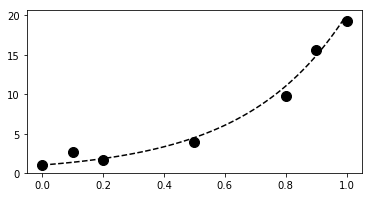

In [5]:
plt.figure(figsize=(6,3));
plt.plot(x_tr[:100], y_tr[:100], '--k');
plt.plot(x, y, 'ok', ms=10);

Wir werden nun mit `scikit-learn` zunächst eine [lineare Interpolation](https://de.wikipedia.org/wiki/Interpolation) versuchen. Dabei gehen wir wie folgt vor:
1. Wir erzeugen zunächst ein Modell (eine Instanz der Klasse `LinearRegression`)
2. Wir *trainieren* unser Modell, d.h., wir suchen diejenige Gerade, die am besten zu unseren Daten passt
3. Wir nutzen unser Modell (also die Gerade), um Werte *vorherzusagen*
Dabei ist zu beachten, dass man aufgrund der `scikit-learn`-API die Vektoren `x_tr` und `x` von ihrer Zeilenform in Spaltenform transformieren muss, da `scikit-learn` davon ausgeht, dass *Beobachtungen* in *Zeilen* und *Merkmale* in *Spalten* angegeben werden. Wir haben nur 1 *Merkmal* (den jeweiligen `x`-Wert) mit 7 *Beobachtungen* (unsere verrauschten Datenpunkte).

In [6]:
# Instanziierung
lr = lm.LinearRegression()
# Training
lr.fit(x[:, np.newaxis], y);
# Vorhersage
y_lr = lr.predict(x_tr[:, np.newaxis])

Im folgenden Plot ist die Regressionsgerade in grün dargestellt.

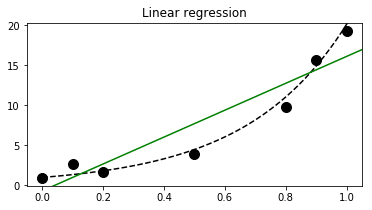

In [7]:
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.xlim(-0.05, 1.05);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear regression");

Offensichtlich passt die Gerade als Approximation nicht besonders gut. Das ist natürlich auch nicht weiter verwunderlich, da unsere Ausgangsfunktion ja *nichtlinear* war. Also versuchen wir es mit einem nichtlinearen Modell, genauer gesagt mit [*Polynominterpolation*](https://de.wikipedia.org/wiki/Polynominterpolation). Interessanter Weise können wir dafür weiter das Verfahren der *linearen Regression* benutzen, nur müssen wir die *Dimensionalität* erhöhen. D.h., wir betrachten ein Polynom als *Linearkombination* der Potenzfunktionen bis hin zum *Grad* $d$ des Polynoms. Damit erhalten wir nun $d+1$ *Merkmale*, die linear zum Fuktionswert kombiniert werden sollen. Gesucht werden somit die *Koeffizienten* $a_i, i=1,\dots,d$ der folgenden Form:
$$
p(x) = a_0 + a_1 x^1 + a_2 x^2 + \cdots + a_d x^d
$$
Mit im Allgemeinen $n$ Beobachtungen ($n=7$ in unserem Fall) erhalten wir dann ein (zumeist unter- oder überbestimmtes) lineares Gleichungssystem der Form
$$
\left(
\matrix{
1 & x_1 & x_1^2 & \cdots & x_1^d\\
1 & x_2 & x_2^2 & \cdots & x_2^d\\
1 & x_3 & x_3^2 & \cdots & x_3^d\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_n & x_n^2 & \cdots & x_n^d
}
\right) \cdot
\left(
\matrix{ a_0 \\ \vdots \\ a_i \\ \vdots \\ a_d}
\right) =
\left(
\matrix{f_1 \\ \vdots \\ f_k \\ \vdots \\ f_n}
\right)
$$

Dies müssen wir dann "so gut es geht" lösen, d.h., wir werden versuchen, den *Fehler*, den wir machen, nach bestimmten Kriterien zu *minimieren* (meistens mit der [Methode der kleinsten Quadrate](https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate)).

Der geschilderte Ansatz entspricht der Polynominterpolation mit Hilfe der [Vandermonde-Matrix](https://de.wikipedia.org/wiki/Vandermonde-Matrix) und `numpy` hat dafür praktischer Weise die Funktion `np.vander` parat. Wir versuchen es mit Polynomen vom Grad 2 und 5.

26.60 -9.83 0.00
-85.88 177.67 -81.14 -0.82 8.51 0.00


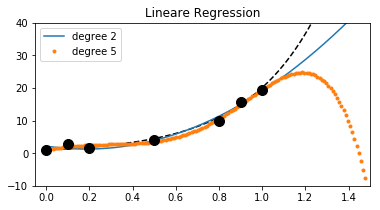

In [8]:
lrp = lm.LinearRegression()  # Modell
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y);  # Training
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1)) # Vorhersage
    plt.plot(x_tr, y_lrp, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(-0.05, 1.5);
    plt.ylim(-10, 40);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Lineare Regression");

Man kann hier (abhängig von den erzeugten Zufallsdaten) ein bekanntes Phänomen sehr gut erkennen: Das Polynom fünften Grades ist sehr gut an die Trainingsdaten angepasst und trifft diese sehr genau; außerhalb des Intervalls $[0,1]$, in dem die $x$-Werte liegen, ist das Polynom jedoch u.U. extrem schlecht geeignet (*Hinweis:* Um dies zu erkennen, müssen Sie die Daten und das Modell eventuell mehrfach generieren). Man spricht hier von *Überanpassung* (engl. **overfitting**), d.h. ein solches Modell ist für die Trainingsdaten gut geeignet, aber der eigentlichen Aufgabe, nämlich der *Vorhersage* nicht gewachsen.

Mit einem anderen Verfahren, der sogenannten **Ridge Regression** können wir des Problems Herr werden. Die Idee dabei ist, die **Kostenfunktion** zu **regularisieren** (genaueres hierzu findet man unter dem Begriff [Tichonow-Regularisierung](https://en.wikipedia.org/wiki/Tikhonov_regularization)).

Hier soll es aber vor allem darum gehen, was mit `scikit-learn` alles auf einfachste Art und Weise möglich ist. Zunächst könnten wir versuchen, mit Hilfe der Klasse `Rigde` und Trial-and_Error ein möglichst gut zur Vorhersage geeignetes Polynom zu finden (dazu müsste man den *Regularisierungsparameter* variieren). Glücklicher Weise gibt es jedoch auch die Klasse (bzw. das Modell) `RidgeCV`, welches dies mit Hilfe von [Kreuzvalidierung](https://de.wikipedia.org/wiki/Kreuzvalidierungsverfahren) (engl. **cross validation**) für uns gleich mit übernimmt.

Da in `scikit-learn` immer erst mittels `fit`trainiert und dann mittels `predict` vorhergesagt wird, können wir durch leichte Modifikation des vorherigen Codes ein gut geeignetes Modell finden.

11.82 4.50 0.00
4.08 4.13 3.97 3.39 2.35 0.00


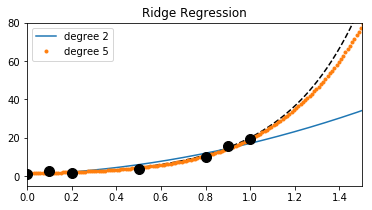

In [9]:
ridge = lm.RidgeCV()  #  anderes Modell
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y);  # Training (neu)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1)) # Vorhersage (neu)
    plt.plot(x_tr, y_ridge, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.5);
    plt.ylim(-5, 80);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in ridge.coef_]))

plt.plot(x, y, 'ok', ms=10);
plt.title("Ridge Regression");

Tatsächlich kann man hier deutlich erkennen, dass das quadratische Polynom *unterangepasst* (engl. **underfitted**) ist (das Polynom ersten Grades, also unsere ursprüngliche Gerade, war dies offenbar auch). Die Regularisierung hat hier der Überanpassung effektiv entgegen gewirkt.

# Anwendung: Aus Texten lernen: Naive Bayes für Sprachverarbeitung

Wir werden hier einen ersten Ansatz für die *Sprchverarbeitung* in Python kennen lernen, wobei wir wieder `scikit-learn` einsetzen werden. Es bedarf in diesem Zusammenhang einer gründlichen Vorverarbeitung der Daten und der *Merkmalsextraktion* (engl. **feature extraction**). Man hat es ferner mit sehr *dünn besetzten Matrizen* (engl. **sparse matrices**) zu tun.

Ziel ist es, Beleidigungen in Diskussionforen zu erkennen. Der zugehörige Datensatz findet sich im [Daten-Repository](https://github.com/ipython-books/cookbook-data) des [Cookbook](https://ipython-books.github.io/)s. Benötigt wird `troll.zip`. Ursprünglich wurde dieser von der Frima  [Impermium](https://impermium.com) im Rahmen eines [Kaggle Wettbewerbs](https://www.kaggle.com/c/detecting-insults-in-social-commentary) bereit gestellt.

***Hinweis:*** Oftmals wird für die Sprachverarbeitung anstelle von `scikit-learn` das spezialisierte Paket [nltk](http://www.nltk.org/) verwendet.

Zunächst importieren wir noch weitere Pakete.

In [10]:
import pandas as pd
import sklearn
import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
import sklearn.naive_bayes as nb

Dann lesen wir die Daten in ein Pandas-Dataframe ein.

In [11]:
df = pd.read_csv("data/troll.csv")

Jede Zeile enthält einen Kommentar nebst Klassifizierung desselben als *beleidigend* (1) oder nicht (0) sowie dem Datum des Kommentars.

In [12]:
df.tail()

,Insult,Date,Comment
3942,1,20120502172717Z,"""you are both morons and that is never happening"""
3943,0,20120528164814Z,"""Many toolbars include spell check, like Yahoo..."
3944,0,20120620142813Z,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F..."
3945,0,20120528205648Z,"""How about Felix? He is sure turning into one ..."
3946,0,20120515200734Z,"""You're all upset, defending this hipster band..."


Jetzt definieren wie die *Merkmalsmatrix* $\mathbf{X}$ und die *Klassifikationen* (labels) $\mathbf{y}$. Letzteres ist einfach:

In [13]:
y = df['Insult']

Die Merkmalsmatrix hingegen ist deutlich schwieriger zu erhalten. `scikit-learn` kann nur mit Zahlen in Matrizen etwas anfangen, so dass man den Text also in eine Matrix umwandeln muss. Dies geschieht meist in zwei Schritten:
1. Man extrahiert ein **Vokabular**, d.h. eine Liste von Worten, die im Text (in unserem Fall: in den Kommentaren) benutzt wurden
2. Anschließend zählt man in jedem Datensatz, wie oft das jeweilige Wort darin vorkommt. Da es im Allgemeinen sehr viele Worte gibt und nur die wenigsten davon in einem bestimmten Datensatz (bei uns: in einem Kommentar) wirklich benutzt werden, führt dies zu einer Matrix, die hauptsächlich Nullen enthält (also dünn besetzt ist).

Mit Hilfe von `scikit-learn` brauchen wir nur zwei Zeilen Code hierfür. Es kommt das [tf-idf](https://de.wikipedia.org/wiki/Tf-idf-Ma%C3%9F) Verfahren zum Einsatz, mit dessen Hilfe zu häufig vorkommende Worte ("the", "and, etc.) adäquat behandelt werden können.

In [14]:
tf = text.TfidfVectorizer()  # tf-idf 
X_vec = tf.fit(df['Comment'])
X = X_vec.transform(df['Comment'])
# X = tf.fit_transform(df['Comment'])
print(X.shape)

(3947, 16469)


Es gibt also 3947 Kommentare und 16469 unterschiedliche Worte. Interessant ist auch, wie dünn die Merkmalsmatrix besetzt ist. Dies können wir wie folgt schätzen:

In [15]:
X_vec.vocabulary_

{'you': 16397,
 'fuck': 5434,
 'your': 16405,
 'dad': 3409,
 'really': 11568,
 'don': 4075,
 'understand': 14793,
 'point': 10754,
 'xa0': 15720,
 'it': 7048,
 'seems': 12484,
 'that': 13995,
 'are': 983,
 'mixing': 8589,
 'apples': 938,
 'and': 806,
 'oranges': 10072,
 'xc2': 16160,
 'xa0majority': 15938,
 'of': 9942,
 'canadians': 2229,
 'can': 2226,
 'has': 6080,
 'been': 1500,
 'wrong': 15619,
 'before': 1509,
 'now': 9576,
 'will': 15462,
 'be': 1452,
 'again': 602,
 'nunless': 9777,
 're': 11540,
 'supportive': 13647,
 'the': 13998,
 'idea': 6558,
 'nothing': 9565,
 'is': 7020,
 'full': 5482,
 'proof': 11148,
 'or': 10070,
 'perfect': 10478,
 'so': 13022,
 'take': 13786,
 'chances': 2431,
 'if': 6581,
 'we': 15294,
 'should': 12728,
 'inadvertently': 6693,
 'kill': 7417,
 'son': 13098,
 'daughter': 3474,
 'then': 14019,
 'them': 14016,
 'breaks': 1960,
 'always': 750,
 'regard': 11685,
 'as': 1052,
 'collateral': 2758,
 'damage': 3424,
 'like': 7841,
 'in': 6690,
 'wartime': 1525

$X$ ist eine [scipy.sparse.csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html). Diese spezielle Datenstruktur speichert nur diejenigen Einträge, die wirklich nicht $0$ sind und dazu deren Koordinaten in der Matrix mit Hilfe zweier spezieller Indexstrukturen (Beispiele dazu finden sich in obigem Link). Wir schauen uns dies alles genauer an:

In [16]:
X.nnz # Anzahl Nicht-Null-Einträge

100269

In [17]:
X.data # die Nicht-Null-Einträge als Array

array([ 0.30831977,  0.20722267,  0.48374632, ...,  0.15469143,
        0.07678784,  0.20409929])

In [18]:
X.max() # höchster tf-idf-Wert

1.0

In [19]:
X.indices # Indexarray

array([ 3409,  5434, 16397, ..., 15294, 16397, 16405], dtype=int32)

In [20]:
X.indptr # Array von Indexpointern

array([     0,      4,     19, ..., 100202, 100231, 100269], dtype=int32)

In [21]:
print("Die Merkmalsmatrix hat ~{0:.2f}% von Null verschiedene Einträge.".format(
          100 * X.nnz / float(X.shape[0] * X.shape[1])))

Die Merkmalsmatrix hat ~0.15% von Null verschiedene Einträge.


Nun trainieren wir wieder den Klassifikator. Da wir ähnlich wie bei der *Rigde Regression* auch hier die *Kreuzvalidierung* anwenden wollen, müssen wir dafür aber unsere Daten in Trainings- und Testdaten aufteilen.

In [22]:
(X_train, X_test, y_train, y_test) = ms.train_test_split(X, y, test_size=.2)

Wir verwenden eine besondere Form des Naive-Bayes-Verfahrens, nämlich den [Bernoulli Naive Bayes Klassifikator](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Bernoulli_naive_Bayes), der eigentlich nicht die Häufigkeit eines Wortes betrachtet, sondern nur, ob es vorhanden ist oder nicht. Zusätzlich wird eine *Glättung* mit Hilfe eines Parameters $\alpha$ durchgeführt (eine Erklärung des Ansatzes findet man bei der [Stanford University](https://nlp.stanford.edu/courses/cs224n/2001/gruffydd/smoothing.html) und wir kennen ihn als Laplace-Schätzer ...).

In [23]:
bnb = ms.GridSearchCV(nb.BernoulliNB(), param_grid={'alpha':np.logspace(-2., 2., 50)})
bnb.fit(X_train, y_train);

Wie gut funktioniert dieser Klassifikator auf unseren Testdaten?

In [24]:
bnb.score(X_test, y_test)

0.73164556962025318

Wir erzielen also eine Trefferquote von ca. 73$\%$ (bei der speziellen Aufteilung in Test- und Trainingsdaten, die auch eine Zufallskomponente beinhaltet!). Interessant ist auch, welche Worte am häufigsten in beleidigenden Kommentaren zu finden sind. Dies findet man wie folgt heraus:

In [25]:
# Worte, die zu den (numerischen) Merkmalen gehören
names = np.asarray(tf.get_feature_names())
# Die 50 Worte mit den höchetn Koeffizienten
print(','.join(names[np.argsort(
    bnb.best_estimator_.coef_[0,:])[::-1][:50]]))

you,are,your,the,to,and,of,that,it,is,in,like,on,have,just,not,for,re,an,xa0,fuck,get,idiot,what,so,all,go,with,this,up,be,don,do,no,can,stupid,as,but,or,know,about,ass,who,if,because,me,back,little,was,bitch


Zum Schluss testen wir noch, wie gut das mit selbst erdachten Beispielen funktioniert.

In [26]:
print(bnb.predict(tf.transform([
    "You are absolutely right.",
    "This is beyond moronic.",
    "LOL"
    ])))

[1 1 0]


Allem Anschein nach wird das Wort "absolutely" doch recht häufig in Beleidigungen verwendet, während "right" vielleicht gar nicht so häufig vorkommt ...

### Zum Vergleich: CountVectorizer

In [27]:
co = text.CountVectorizer()  # count
Xc_vec = co.fit(df['Comment'])
Xc = Xc_vec.transform(df['Comment'])
# Xc = co.fit_transform(df['Comment'])
print(Xc.shape)

(3947, 16469)


In [28]:
Xc_vec.vocabulary_

{'you': 16397,
 'fuck': 5434,
 'your': 16405,
 'dad': 3409,
 'really': 11568,
 'don': 4075,
 'understand': 14793,
 'point': 10754,
 'xa0': 15720,
 'it': 7048,
 'seems': 12484,
 'that': 13995,
 'are': 983,
 'mixing': 8589,
 'apples': 938,
 'and': 806,
 'oranges': 10072,
 'xc2': 16160,
 'xa0majority': 15938,
 'of': 9942,
 'canadians': 2229,
 'can': 2226,
 'has': 6080,
 'been': 1500,
 'wrong': 15619,
 'before': 1509,
 'now': 9576,
 'will': 15462,
 'be': 1452,
 'again': 602,
 'nunless': 9777,
 're': 11540,
 'supportive': 13647,
 'the': 13998,
 'idea': 6558,
 'nothing': 9565,
 'is': 7020,
 'full': 5482,
 'proof': 11148,
 'or': 10070,
 'perfect': 10478,
 'so': 13022,
 'take': 13786,
 'chances': 2431,
 'if': 6581,
 'we': 15294,
 'should': 12728,
 'inadvertently': 6693,
 'kill': 7417,
 'son': 13098,
 'daughter': 3474,
 'then': 14019,
 'them': 14016,
 'breaks': 1960,
 'always': 750,
 'regard': 11685,
 'as': 1052,
 'collateral': 2758,
 'damage': 3424,
 'like': 7841,
 'in': 6690,
 'wartime': 1525

In [29]:
Xc.nnz # Anzahl Nicht-Null-Einträge

100269

In [30]:
Xc.data # die Nicht-Null-Einträge als Array

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
Xc.max() # höchster Count

97

In [32]:
Xc.indices # Indexarray

array([ 3409,  5434, 16397, ..., 15294, 16397, 16405], dtype=int32)

In [33]:
Xc.indptr # Array von Indexpointern

array([     0,      4,     19, ..., 100202, 100231, 100269], dtype=int32)

**Bemerkung**: an den Indexstrukturen sieht man, dass (wie erwartet) die gleichen Elemente von $0$ verschieden sind bei $X$ und $Xc$. Daher ist zu erwarten, dass das Bernoulli Naive Bayes Verfahren bei beiden Vektorisierungen zum gleichen Ergebnis führt, da dies ja die Merkmalsmatrizen *binärisiert*!

In [34]:
print("Die Merkmalsmatrix hat ~{0:.2f}% von Null verschiedene Einträge.".format(
          100 * Xc.nnz / float(Xc.shape[0] * Xc.shape[1])))

Die Merkmalsmatrix hat ~0.15% von Null verschiedene Einträge.


Nun wiederum die Aufteilung in Trainings- und Testdaten:

In [35]:
(Xc_train, Xc_test, yc_train, yc_test) = ms.train_test_split(Xc, y, test_size=.2)

Und nun wieder das Bernoulli-Naive-Bayes-Verfahren:

In [36]:
bnbc = ms.GridSearchCV(nb.BernoulliNB(), param_grid={'alpha':np.logspace(-2., 2., 50)})
bnbc.fit(Xc_train, yc_train);

Wie gut funktioniert dieser Klassifikator auf unseren Testdaten?

In [37]:
bnbc.score(Xc_test, yc_test)

0.77721518987341776

Die erzielte Trefferquote von ca. 77$\%$ ist also höher als zuvor, was an der abweichenden Aufteilung in Test- und Trainingsdaten liegt ...

Und wieder die selbst erdachten Beispiele:

In [38]:
print(bnbc.predict(co.transform([
    "You are absolutely right.",
    "This is beyond moronic.",
    "LOL"
    ])))

[1 1 0]


Beide Modelle kommen also bei unseren selbst erdachten Beispielen zum gleichen Ergebnis.

